### PART ONE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quandl

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
dataset = quandl.get("BSE/BOM500034", authtoken="ySWkR96uDb-6XqvsY-ds")

In [3]:
index = int(len(dataset)*0.8)
#CSV1
dataset_train = dataset[:index]
#CSV2
dataset_test = dataset[index+1:]

# 0:1 return array of shape (x,1)  
# simply using 0 will return a shape (x,)
training_set = dataset_train.iloc[:,0:1].values
real_stock_price = dataset_test.iloc[:,0:1].values

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(dataset_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print((X_train.shape[0], X_train.shape[1], 1))
print('Number of example:',X_train.shape[0],"\nSize of input: ",(X_train.shape[1],1))

(4428, 60, 1)
Number of example: 4428 
Size of input:  (60, 1)


In [7]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
4428/4428 [==============================] - 12s 3ms/step - loss: 0.0037
Epoch 2/10
4428/4428 [==============================] - 11s 2ms/step - loss: 0.0010
Epoch 3/10
4428/4428 [==============================] - 11s 2ms/step - loss: 8.4856e-04
Epoch 4/10
4428/4428 [==============================] - 11s 2ms/step - loss: 8.5465e-04
Epoch 5/10
4428/4428 [==============================] - 10s 2ms/step - loss: 8.5048e-04
Epoch 6/10
4428/4428 [==============================] - 10s 2ms/step - loss: 8.4057e-04
Epoch 7/10
4428/4428 [==============================] - 10s 2ms/step - loss: 6.6863e-04
Epoch 8/10
4428/4428 [==============================] - 10s 2ms/step - loss: 7.3861e-04
Epoch 9/10
4428/4428 [==============================] - 10s 2ms/step - loss: 7.1742e-04
Epoch 10/10
4428/4428 [==============================] - 11s 2ms/step - loss: 6.1522e-04


###### Getting the predicted stock price of 2017inputs = inputs.reshape(-1,1)
inputs = real_stock_price

inputs = sc.transform(inputs)
X_test = []
pred=[]
for i in range(60, 61):
    X_test.append(inputs[i-60:i, 0])
print(len(X_test),len(X_test[0]))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price
np.array(x)



In [8]:
inputs = list(real_stock_price)#(real_stock_price[len(real_stock_price)-60:])
op=[]
for i in range(180):
    inputs = (sc.transform(inputs[:]))
    X_test=[]
    for j in range(60+i, 240+i):
        X_test.append(inputs[j-60:j, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = regressor.predict(X_test)
    inputs=np.append(inputs,np.array(predicted_stock_price))
    inputs=np.reshape(inputs,(inputs.shape[0],1))
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    op.append(predicted_stock_price)

In [9]:
print(np.array(op).shape)
xx=op[0]

#print(xx)

(180, 180, 1)


In [10]:
xx

array([[2989.7588],
       [2999.3945],
       [3010.7253],
       [3023.3757],
       [3037.236 ],
       [3050.9915],
       [3063.7532],
       [3075.5518],
       [3086.4893],
       [3096.6575],
       [3107.2385],
       [3118.8125],
       [3131.7073],
       [3145.7878],
       [3160.362 ],
       [3175.147 ],
       [3189.7932],
       [3203.6584],
       [3216.0127],
       [3226.281 ],
       [3234.866 ],
       [3242.2168],
       [3248.332 ],
       [3253.2695],
       [3257.3853],
       [3263.1821],
       [3272.5945],
       [3287.3962],
       [3306.999 ],
       [3330.3757],
       [3355.53  ],
       [3380.8145],
       [3404.9788],
       [3428.8574],
       [3454.3027],
       [3481.381 ],
       [3508.508 ],
       [3534.8914],
       [3559.9475],
       [3583.0356],
       [3603.4104],
       [3620.1218],
       [3632.5332],
       [3640.8618],
       [3646.2537],
       [3649.977 ],
       [3653.3801],
       [3657.9482],
       [3664.4236],
       [3672.8887],


In [11]:
print(predicted_stock_price.shape,real_stock_price.shape,inputs[60:,0].shape)

(180, 1) (1121, 1) (33461,)


In [12]:
def spl(a,b):
    x=sum(a)//len(a)
    y=sum(b)//len(b)
    return (y-x)/y    

In [13]:
xx

array([[2989.7588],
       [2999.3945],
       [3010.7253],
       [3023.3757],
       [3037.236 ],
       [3050.9915],
       [3063.7532],
       [3075.5518],
       [3086.4893],
       [3096.6575],
       [3107.2385],
       [3118.8125],
       [3131.7073],
       [3145.7878],
       [3160.362 ],
       [3175.147 ],
       [3189.7932],
       [3203.6584],
       [3216.0127],
       [3226.281 ],
       [3234.866 ],
       [3242.2168],
       [3248.332 ],
       [3253.2695],
       [3257.3853],
       [3263.1821],
       [3272.5945],
       [3287.3962],
       [3306.999 ],
       [3330.3757],
       [3355.53  ],
       [3380.8145],
       [3404.9788],
       [3428.8574],
       [3454.3027],
       [3481.381 ],
       [3508.508 ],
       [3534.8914],
       [3559.9475],
       [3583.0356],
       [3603.4104],
       [3620.1218],
       [3632.5332],
       [3640.8618],
       [3646.2537],
       [3649.977 ],
       [3653.3801],
       [3657.9482],
       [3664.4236],
       [3672.8887],


In [14]:
spl(predicted_stock_price,xx)

array([1.0037413], dtype=float32)

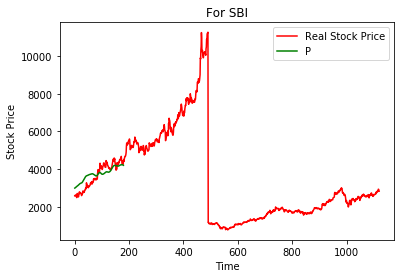

In [15]:
# Visualising the results
plt.plot(real_stock_price[:,0], color = 'red', label = 'Real Stock Price')
#plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.plot(xx, color = 'green', label = 'P')
plt.title('For SBI')
plt.xlabel('Time')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

# Everything works

### PART TWO  TWITTER SENTIMENT ANALYSIS

In [16]:
def tsa(company):
    import tweepy
    from textblob import TextBlob

    consumer_key='E94sIzRD7vzERsetUTkEO1BdX'
    consumer_secret='xOKQywPpJeZGzI0dB3LB8nmOlMcR7tapUsWTfAh4MsFkaaKOC3'

    access_token='1433534281-hqKtWpz29AyxjmINhv7P5TKdqhnjBCLQAD06IDF'
    access_secret='j9YdOcy52UjJYpWfYEbSL2Mkf789Ix1J3WB7ovqew0Ye7'

    auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_secret)

    api=tweepy.API(auth)

    public_tweets = api.search(company)
    x=[]
    for tweets in public_tweets:
        #print(tweets.text)
        analysis=TextBlob(tweets.text)
        x.append([analysis.sentiment[0],analysis.sentiment[1]])
    return x

In [18]:
company='Bajaj Finance'

In [19]:
x=tsa(company)

In [20]:
def sp2(x):
    return(sum(x)/len(x))
sp2(x)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [21]:
sd1=np.std([i[0] for i in x ])

In [22]:
sd2 = np.std([i[1] for i in x])

## PART 3 NEWS SENTIMENT ANALYSIS

In [23]:
from bs4 import BeautifulSoup as soup
import requests
import re
from textblob import TextBlob 

In [24]:
def livemint(url_list):
    text=[]
    for i in url_list:
        if('livemint'  in i):
            page1=requests.get(i)
            htmlpage1 = soup(page1.text,'html.parser')
            no1 = htmlpage1.findAll('script',{})
            l=str(no1[2]) 
            text.append(l[740:-740])
        else:
            continue
    #print(text)
    return text

In [25]:
def et(url_list):
    text=[]
    for i in url_list:
        if('www.economictimes' in i):
            #print(i)
            page1=requests.get(i)
            htmlpage1 = soup(page1.text,'html.parser')
            no1 = htmlpage1.findAll('div',{})
            x=re.search('"Normal"', str(no1)).start()
            y=re.search('<div class="clr"></div><div class="clr">', str(no1)).start()
            l=str(no1)
            l=l[x:y]
            l= soup(l).text
            text.append(l)
    return text

In [26]:
def moneycontrol(url_list):
    text=[]
    for i in url_list:
        if('moneycontrol' in i):
            page1=requests.get(i)
            htmlpage1 = soup(page1.text,'html.parser')
            no1 = htmlpage1.findAll('p',{})
            no1=no1[:-4]
            l=str(no1)
            l=soup(l).text
            text.append(l)
    return text

In [27]:
def nsa(company):
    url_list=[]
    pgno=1
    while(True):
        url = "https://www.ibbi.gov.in/media/media-coverage?title="+company+"&date=&page="+str(pgno)
        page = requests.get(url)
        html_soup = soup(page.text,'html.parser')
        no = html_soup.findAll('td',{})
        if(no ==[]):
            break
        k=1
        for i in range(len(no)//2):
            x=re.search("(?P<url>https?://[^\s]+)", str(no[k])).group("url")
            x=x[:-5]
            url_list.append(x)
            k=k+2
        pgno+=1

    news=livemint(url_list)
    news += et(url_list)
    news += moneycontrol(url_list)
    sa=[]
    for n in news:
        senti=TextBlob(n)
        sa.append([senti.sentiment[0],senti.sentiment[1]])
    return sa


In [29]:
SA=nsa(company)

In [30]:
sd1=np.std([i[0] for i in SA ])
if(sd1 == float('nan')): sd1=0

d:\softwares\anaconda\envs\tensor\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
d:\softwares\anaconda\envs\tensor\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
d:\softwares\anaconda\envs\tensor\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
sd2 = np.std([i[1] for i in SA])
if(sd2 == float('nan')): sd2=0

# Parent Model PROCESSING

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
def get_from_nsa(company):
    SA=nsa(company)
    if(len(SA)==0):
        return 0,0
    sd1 = np.std([i[0] for i in SA])
    sd2 = np.std([i[1] for i in SA])
    return sd1,sd2

In [63]:
def get_from_tsa(company):
    x=tsa(company)
    
    if(len(x)==0):
        return 0,0
    sd1=np.std([i[0] for i in x ])
    sd2=np.std([i[1] for i in x ])
    return sd1,sd2

In [64]:
sc1=(int(xx[-1])-int(xx[0]))/int(xx[0])

RETURN = [sc1]
sd1a,sd2a=get_from_nsa(company)
sd1b,sd2b=get_from_tsa(company)


In [65]:
RETURN.extend([sd1a,sd2a,sd1b,sd2b])

In [66]:
RETURN[0]=(int(xx[-1])-int(xx[0]))/int(xx[0])

In [67]:
import pickle

In [68]:
RETURN

[0.4054867848778856, 0, 0, 0.3109126351029605, 0.35857549956583606]

In [76]:
bomb=['BOM521070','BOM532778','BOM532977','BOM533295','BOM533273']

In [77]:
def call_find(company):
    sc1=0
    avg=0
    '''
    if(name in d):
        code=d[name]
    else:
        rl1.config(text="Company Data not found")
        return
    '''
    #main model
    dataset = quandl.get("BSE/"+str(company) , authtoken="ySWkR96uDb-6XqvsY-ds")
    index = int(len(dataset)*0.8)
    #CSV1
    dataset_train = dataset[:index]
    #CSV2
    dataset_test = dataset[index+1:]

    # 0:1 return array of shape (x,1)  
    # simply using 0 will return a shape (x,)
    training_set = dataset_train.iloc[:,0:1].values
    real_stock_price = dataset_test.iloc[:,0:1].values

    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    # Creating a data structure with 60 timesteps and 1 output
    X_train = []
    y_train = []
    for i in range(60, len(dataset_train)):
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    # Adding a second LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, epochs = 4, batch_size = 32)

    inputs = list(real_stock_price)#(real_stock_price[len(real_stock_price)-60:])
    op=[]
    for i in range(180):
        inputs = (sc.transform(inputs[:]))
        X_test=[]
        for j in range(60+i, 240+i):
            X_test.append(inputs[j-60:j, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        predicted_stock_price = regressor.predict(X_test)
        inputs=np.append(inputs,np.array(predicted_stock_price))
        inputs=np.reshape(inputs,(inputs.shape[0],1))
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)
        op.append(predicted_stock_price)

    xx=op[0]
    
    sc1=(int(xx[-1])-int(xx[0]))/int(xx[0])
    
    RETURN = [sc1]
    sd1a,sd2a=get_from_nsa(company)
    sd1b,sd2b=get_from_tsa(company)
    RETURN.extend([sd1a,sd2a,sd1b,sd2b])
    
    return RETURN
    


In [80]:
superret=[]
for i in bomb[:]:
    a=call_find(i)
    superret.append(a)
    print(a)

Epoch 1/10
4710/4710 [==============================] - 16s 3ms/step - loss: 0.0039
Epoch 2/10
4710/4710 [==============================] - 12s 2ms/step - loss: 0.0014
Epoch 3/10
4710/4710 [==============================] - 11s 2ms/step - loss: 0.0017
Epoch 4/10
4710/4710 [==============================] - 11s 2ms/step - loss: 0.0011
Epoch 5/10
4710/4710 [==============================] - 11s 2ms/step - loss: 0.0012
Epoch 6/10
4710/4710 [==============================] - 45s 9ms/step - loss: 8.8434e-04
Epoch 7/10
4710/4710 [==============================] - 34s 7ms/step - loss: 9.4706e-04
Epoch 8/10
4710/4710 [==============================] - 21s 5ms/step - loss: 8.7052e-04
Epoch 9/10
4710/4710 [==============================] - 14s 3ms/step - loss: 9.7231e-04
Epoch 10/10
4710/4710 [==============================] - 11s 2ms/step - loss: 7.9345e-04
[-0.36363636363636365, 0, 0, 0, 0]
Epoch 1/10
2279/2279 [==============================] - 11s 5ms/step - loss: 0.0089
Epoch 2/10
2279/2279

In [83]:
superret

[[-0.36363636363636365, 0, 0, 0, 0],
 [-1.0, 0, 0, 0, 0],
 [0.14928193499622072, 0, 0, 0, 0],
 [-0.3404255319148936, 0, 0, 0, 0],
 [0.1276595744680851, 0, 0, 0, 0]]

In [84]:
pd.DataFrame(superret).to_csv("feature.csv")

## PARENT MODEL BEGINS

In [86]:
data = pd.read_csv('./feature.csv')
data=data.iloc[:,1:].values


In [87]:
kmeans = KMeans(n_clusters=2)

In [88]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
filename = 'finalized_model.sav'

In [90]:
pickle.dump(kmeans, open(filename, 'wb'))

In [91]:
kmeans = pickle.load(open(filename, 'rb'))